![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

### Loading Data

In [61]:
# Start your code here!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
mendf=pd.read_csv("men_results.csv")
womendf=pd.read_csv("women_results.csv")

In [63]:
mendf.head(3)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly


In [64]:
womendf.head(2)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro


### EDA

In [65]:
womendf.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')

In [66]:
womendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


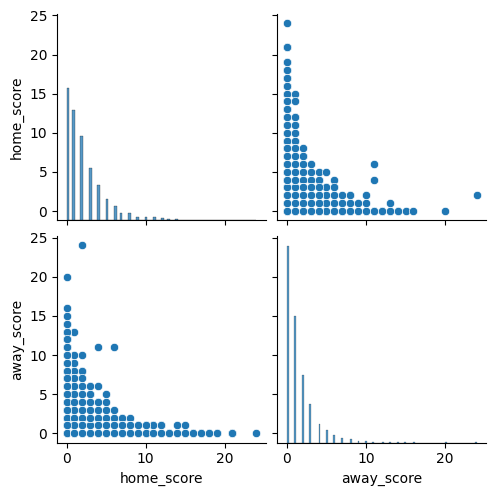

In [67]:
sns.pairplot(data=womendf,vars=["home_score","away_score"])
plt.show()

###  Missing values 

In [68]:
print("# of missing values in womenData_Frame "+str(womendf.isnull().sum()))
print("# of missing values in ManData_Frame "+str(mendf.isnull().sum()))


# of missing values in womenData_Frame Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64
# of missing values in ManData_Frame Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64


### Duplicated value

In [69]:
print("# of duplicate values in womenData_Frame is "+str(womendf.duplicated().sum()))
print("# of duplicate values in ManData_Frame is "+str(mendf.duplicated().sum()))

# of duplicate values in womenData_Frame is 0
# of duplicate values in ManData_Frame is 0


## Are more goals scored in women's international soccer matches than men's?

### 1-filter data for only FIFA World Cup with matches after "2002-01-01"

In [70]:
WDF=womendf[(womendf["tournament"]=="FIFA World Cup") &(womendf["date"] > "2002-02-02")]
MDF=mendf[(mendf["tournament"]=="FIFA World Cup")&(mendf["date"]>"2002-01-01")] 

### 2- check the normality of data in women-dataset

In [71]:
WDF["total_score"]=WDF["home_score"]+WDF["away_score"]
MDF["Total_score"]=MDF["home_score"]+MDF["away_score"]

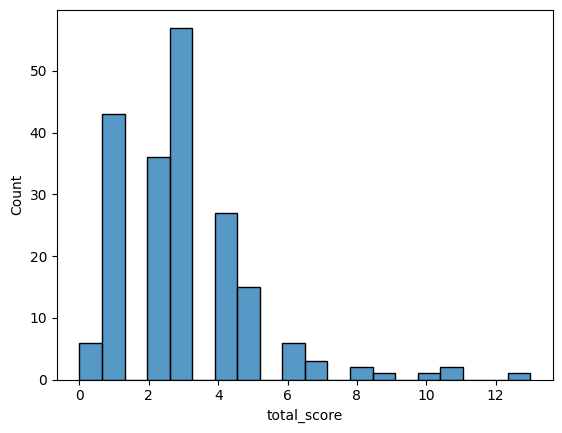

In [72]:
sns.histplot(data=WDF,x="total_score")
plt.show()

### - check the normality of data in men-dataset

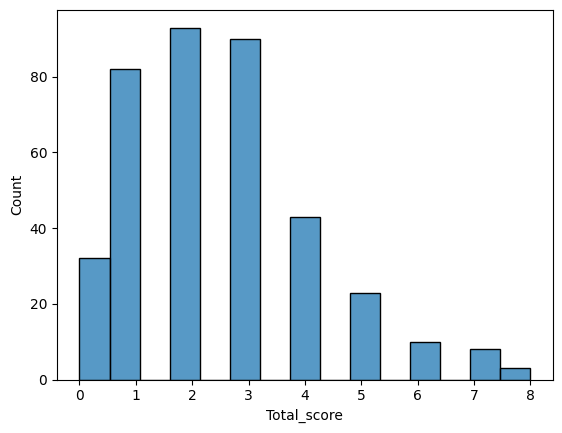

In [73]:
sns.histplot(data=MDF,x="Total_score")

plt.show()

### 3- Perform the Hyposses testsing

In [74]:
import pingouin
Hyposses_result=pingouin.mwu(x=WDF["total_score"],y=MDF["Total_score"],alternative="greater")
print(Hyposses_result)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


### 4 -Extracting the p_value 

In [75]:

p_value=float(Hyposses_result["p-val"])
print(p_value)

0.005106609825443641


**Because the p_value less than alpha 
0.005106609825443641 < 0.01 Then,
the {H_Null "rejected"}**

In [76]:
result="reject"
result_dict= {"p_val": p_value, "result": result}